## Final Project Submission

Please fill out:
* Student name: Whitney Ndivi Ngili
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Mark Tiba 
* Blog post URL:


# Phase 1 Project - Movie Data Analysis
## 1. Introduction

This project is aimed at analysing data on movies 


## 2. Business Understanding
### 2.1. Problem
Microsoft is setting up a new studio to create original video content. 

### 2.2. Aim

### 2.3 Objectives

![Inception](Images/inception_poster.jpg)

## 3. Data Understanding
The datasets provided for this analysis have been collected from different movie review aggregation sites and contain information on the various movie genres and their popularity among critics and viewers.  
The datasets include:
1. [Box Office Mojo](https://www.boxofficemojo.com/) 
2. [IMDB](https://www.imdb.com/)
3. [Rotten Tomatoes](https://www.rottentomatoes.com/)
4. [The Movie DB](https://www.themoviedb.org/)
5. [The Numbers](https://www.the-numbers.com/)

For this analysis, datasets 1 to 3 have been used.

Their features are as follows:

**3.1. From Box Office Mojo**
- `title` - Name of the movie.
- `studio` - The studio that produced it.
- `domestic_gross` - The amount of gross income from its mother country.
- `foreign_gross` - The amount of gross income from elsewhere around the world.
- `year` - The year it was released.

**3.2. From Rotten Tomatoes**

Data from Rotten Tomatoes has been divided into two datasets. The first one contains information about the movie itself while the second one contains information about how the audience and critics have rated and reviewed the movies. The features are as follows:
    
**3.2.1. Rotten Tomatoes Movies Information:**

- `id` - Unique id for each movie.
- `synopsis` - A brief note on the premise of the movie.
- `rating` - Classification of the movie based on suitability for audiences.
- `genre` - A movie's category based on the plot.
- `director` - The movie's director.
- `writer` - The movie's writer.
- `theater_date` - The date the movie was released in theaters.
- `dvd_date` - The date the movie was released in dvd format.
- `runtime` - The total length of the movie.

**3.2.2. Rotten Tomatoes Review Information:**

- `review` - A review on the movie by a user.
- `rating` - How a user rates the movie.
- `fresh` - Rotten Tomatoes rating system, the [Tomatometer](https://www.rottentomatoes.com/about#whatisthetomatometer), where fresh means more than 60% of the movie reviews are positive, rotten means less than 60% of the reviews are positive.
- `critic` - Name of the person leaving the review.
- `top_critic` - A categorical column where 1 represents the top critic for the movie being reviewed.
- `publisher` - The publisher of the review.
- `date` - The date the review was written.

**3.3. From IMDB Movies:**
- `movie_id` - Unique id for each movie.
- `primary_title` - The title of the movie once it is internationally released.
- `original_title` - Original title of the movie.
- `start_year` - The year the movie was released.
- `runtime_minutes` - The total length of the movie.
- `averagerating` - The average rating out of 10. 
- `numvotes` - Number of votes made to rate the movie.

## 4. Requirements
1. Load the data with pandas and explore the dataframes.
2. Clean the data by dealing with:
    - missing values
    - duplicate rows
    - invalid data
    - outliers
3. Perform exploratory descriptive analysis in order to answer the business questions.
4. Conclusion.
5. Recommendations.



## 5. Loading the Data
### 5.1 Importing the Libraries
All the relevant libraries for this notebook are imported

In [10]:
#importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns
%matplotlib inline

### 5.2 Loading the Datasets

In [11]:
#opening a connection to the imdb database
conn = sqlite3.connect("zippedData/im.db")

In [12]:
#loading the datasets
bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
rt_movies = pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter = '\t')
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',delimiter = "\t",encoding='latin-1')

### 5.3 Exploring the Dataframes
**a. IMDB movies**

In [13]:
#viewing the list of tables in the imdb database
imdb_tables = pd.read_sql("""
SELECT name TableNames
FROM sqlite_master
WHERE type = 'table'
;
""",conn)
imdb_tables

,TableNames
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [14]:
#previewing movie_ratings table
q1 = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
q1.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
#previewing movie_basics table
q2 = pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
q2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


movie_basics can be joined to movie_ratings

In [16]:
#joining movie_basics to movie_ratings on movie_id and previewing the top
imdb = pd.read_sql("""
SELECT *
FROM movie_basics b
JOIN movie_ratings r
USING (movie_id)
;
""",conn)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [17]:
#previewing the bottom of the imdb dataframe
imdb.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


In [18]:
#determining the number of records in the imdb dataframe
imdb.shape

(73856, 8)

In [19]:
#checking the information
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [20]:
#previewing the summary statistics of imdb 
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


Observations:
1. There are columns with missing data, these are runtime_minutes and genres.
2. runtime_minutes has a movie with 51420 minutes.
3. The genres are separated by commas.

**b. Bom_movies**

In [21]:
#previewing the top of bom_movies
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [22]:
#previewing the bottom of bom_movies
bom_movies.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [23]:
#determining the number of records in the bom_movies dataframe
bom_movies.shape

(3387, 5)

In [24]:
#previewing bom_movies information
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [25]:
#previewing the summary statistics of bom_movies
bom_movies.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Observations:
1. bom_movies has the following columns with missing values: domestic_gross and foreign_gross.
2. The foreign_gross column is in string format.

**c. Rt_movies**

In [26]:
#previewing the top of rt_movies
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [27]:
#previewing the bottom of rt_movies
rt_movies.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [28]:
#determining the number of records in the rt_movies dataframe
rt_movies.shape

(1560, 12)

In [29]:
#previewing information on rt_movies
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Observations:
1. A number of columns have missing values, especially the currency,box_office and studio columns.
2. Values in genre column is separated by pipes ( | ).
3. runtime column is in string format and includes the word "minutes" which can be dropped in order to perform numeric operations on the column

**d. Rt_reviews**

In [30]:
#previewing the top of rt_reviews
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [32]:
#previewing the bottom of rt_reviews
rt_reviews.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [34]:
#determining the number of records in the rt_reviews dataframe
rt_reviews.shape

(54432, 8)

In [35]:
#previewing information on rt_reviews
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


Observations:
1. The columns review,rating and critic have missing values
2. rt_reviews can be merged with rt_movies on id as they are from the same source.
3. There are multiple reviews per movie.
4. The rating column appears to be out of 5.

## 6. Data Cleaning
This section deals with data cleaning methods that prepares the data for exploratory analysis. It tackles the problems with the datasets that have been observed while exploring them and any other that occur afterwards. It addresses the following:
   - Missing values
   - Unwanted observations
   - Structural issues
   - Outliers
   - Invalid data
   - Merges
   - Duplicated rows
   
### 6.1. Missing Values   
All dataframes have columns with missing values. It makes sense to create a fuction that returns the percentage of missing values in each column.

In [40]:
#defining a function that prints the percentage of null rows in all columns 
def find_percentage_of_nulls(df):
    
    #loop through all columns and print percentage of missing values in each
    
    for column in df.columns:
        percentage = round(df[column].isnull().sum()/(len(df))*100,3)
        print(f"The percentage of null rows in column {column} is {percentage}%")    

**imdb movies**

In [41]:
#finding percentage of nulls in imdb
find_percentage_of_nulls(imdb)

The percentage of null rows in column movie_id is 0.0%
The percentage of null rows in column primary_title is 0.0%
The percentage of null rows in column original_title is 0.0%
The percentage of null rows in column start_year is 0.0%
The percentage of null rows in column runtime_minutes is 10.317%
The percentage of null rows in column genres is 1.089%
The percentage of null rows in column averagerating is 0.0%
The percentage of null rows in column numvotes is 0.0%


The imdb dataframe has more than 73000 records. Dropping 10% of the rows still provides us with sufficient data to gain meaningful insights from.

In [48]:
#dropping rows with missing values
imdb.dropna(inplace = True)

In [50]:
#confirming there are no missing values
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


**bom_movies**

In [45]:
#finding percentage of nulls in bom_movies
find_percentage_of_nulls(bom_movies)

The percentage of null rows in column title is 0.0%
The percentage of null rows in column studio is 0.148%
The percentage of null rows in column domestic_gross is 0.827%
The percentage of null rows in column foreign_gross is 39.858%
The percentage of null rows in column year is 0.0%


- The studio column and the domestic_gross column only have 0.827% and 0.148% missing values. It makes sense to drop the rows as they will not affect the data analysis.
- The foreign_gross column has almost 40% of the data being null. As it is in string format, the missing values can be replaced with 0   

In [46]:
#dropping null rows in studio and domestic_gross column
bom_movies.dropna(inplace = True, subset = ['studio','domestic_gross'])

In [51]:
#replace missing values with 0 in foreign_gross column
bom_movies.foreign_gross.fillna('0',inplace = True)

In [52]:
#confirming there are no missing values
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


**rt_movies**

In [53]:
#finding percentage of nulls in rt_movies
find_percentage_of_nulls(rt_movies)

The percentage of null rows in column id is 0.0%
The percentage of null rows in column synopsis is 3.974%
The percentage of null rows in column rating is 0.192%
The percentage of null rows in column genre is 0.513%
The percentage of null rows in column director is 12.756%
The percentage of null rows in column writer is 28.782%
The percentage of null rows in column theater_date is 23.013%
The percentage of null rows in column dvd_date is 23.013%
The percentage of null rows in column currency is 78.205%
The percentage of null rows in column box_office is 78.205%
The percentage of null rows in column runtime is 1.923%
The percentage of null rows in column studio is 68.333%


- The following columns have a large percentage of null values : currency, box_office and studio. The best way to proceed is by dropping these columns. Columns synopsis,director,writer,theater_date,dvd_date are to be dropped as they are not required for this analysis.
- The columns rating,genre, runtime have a small number of null values. These will be handled by dropping the rows.

In [54]:
#dropping columns with too many null values
rt_movies.drop(['synopsis','director','writer','theater_date','dvd_date','currency','box_office','studio'],
               axis = 1,inplace=True)

In [55]:
#dropping rows with null values
rt_movies.dropna(subset = ['rating','genre','runtime'],inplace = True)

In [56]:
#confirming there are no missing values
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 0 to 1559
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1526 non-null   int64 
 1   rating   1526 non-null   object
 2   genre    1526 non-null   object
 3   runtime  1526 non-null   object
dtypes: int64(1), object(3)
memory usage: 59.6+ KB


**rt_reviews**

In [57]:
#checking for percentage of null values in each column
find_percentage_of_nulls(rt_reviews)

The percentage of null rows in column id is 0.0%
The percentage of null rows in column review is 10.22%
The percentage of null rows in column rating is 24.833%
The percentage of null rows in column fresh is 0.0%
The percentage of null rows in column critic is 5.001%
The percentage of null rows in column top_critic is 0.0%
The percentage of null rows in column publisher is 0.568%
The percentage of null rows in column date is 0.0%


Dropping rows in the columns review, critic and publisher suffices as there is still be enough entries to analyse. Exploring the rating column further will help make the better decision.

In [69]:
#checking the unique values in the rating column
rt_reviews.rating.unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

It appears that the rating system in this column is very inconsistent. It is difficult to group them thus dropping the column is the better way to proceed.

In [70]:
#dropping rating column
rt_reviews.drop('rating',axis=1,inplace=True)

In [71]:
#dropping rows with null values
rt_reviews.dropna(inplace = True)

In [72]:
#confirming there are no missing values
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46662 entries, 0 to 54427
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          46662 non-null  int64 
 1   review      46662 non-null  object
 2   fresh       46662 non-null  object
 3   critic      46662 non-null  object
 4   top_critic  46662 non-null  int64 
 5   publisher   46662 non-null  object
 6   date        46662 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.8+ MB


### 6.2 Structural Issues
The dataframes imdb and rt_movies have structural issues. Their genre columns are separated by commas and pipes respectively. This will be dealt with by splitting the columns on their specific delimiters using the `.split()` method then, using the `.explode()` method, transformed into separate rows retaining all other column values. This will increase the number of rows.

**a. imdb movies**

In [74]:
imdb = imdb.assign(genres=imdb.genres.str.split(',')).explode('genres')

In [75]:
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43


**b. rt_movies**

In [76]:
rt_movies = rt_movies.assign(genre=rt_movies.genre.str.split('|')).explode('genre')

In [78]:
rt_movies.head()

,id,rating,genre,runtime
0,1,R,Action and Adventure,104 minutes
0,1,R,Classics,104 minutes
0,1,R,Drama,104 minutes
1,3,R,Drama,108 minutes
1,3,R,Science Fiction and Fantasy,108 minutes


### 6.3. Outliers
The imdb dataframe has a movie that is 51420 minutes long and while the movie exists, it largely skews the data. This can be seen in the boxplot below:

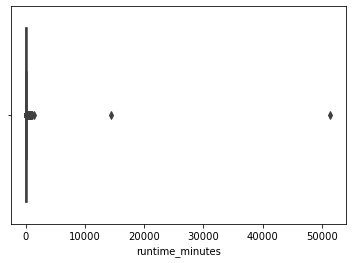

In [94]:
sns.boxplot(data = imdb, x = 'runtime_minutes');

In [96]:
#selecting the rows with the outliers
imdb.loc[imdb.runtime_minutes > 10000]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
27683,tt2659636,Modern Times Forever,Modern Times Forever,2011,14400.0,Documentary,6.2,69
70280,tt8273150,Logistics,Logistics,2012,51420.0,Documentary,5.0,17


In [97]:
#dropping the outliers
imdb = imdb.loc[imdb.runtime_minutes < 10000]

### 6.4 Invalid Data

In [16]:
imdb['rating'] = ["High" if ((x > 5) and (x <= 10)) 
                       else "Low" for x in imdb.averagerating]

In [17]:
imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,rating
0,tt1375666,Inception,Inception,2010,148.0,Action,8.8,1841066,High
0,tt1375666,Inception,Inception,2010,148.0,Adventure,8.8,1841066,High
0,tt1375666,Inception,Inception,2010,148.0,Sci-Fi,8.8,1841066,High
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Action,8.4,1387769,High
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Thriller,8.4,1387769,High
...,...,...,...,...,...,...,...,...,...
2675,tt6097798,Radius,Radius,2017,93.0,Sci-Fi,6.2,10008,High
2675,tt6097798,Radius,Radius,2017,93.0,Thriller,6.2,10008,High
2676,tt2776878,Thank You for Your Service,Thank You for Your Service,2017,109.0,Biography,6.5,10006,High
2676,tt2776878,Thank You for Your Service,Thank You for Your Service,2017,109.0,Drama,6.5,10006,High


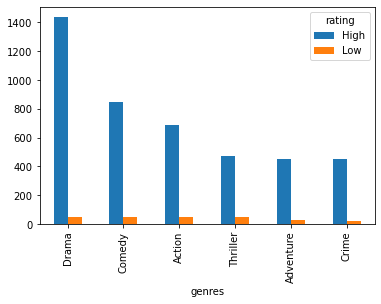

In [75]:
imdb.groupby(['genres','rating'])['movie_id'].count().unstack().sort_values(["High","Low"],ascending=False)[:6].plot(kind='bar');  

In [19]:
np.corrcoef(imdb.numvotes,imdb.averagerating)

array([[1.       , 0.3165095],
       [0.3165095, 1.       ]])

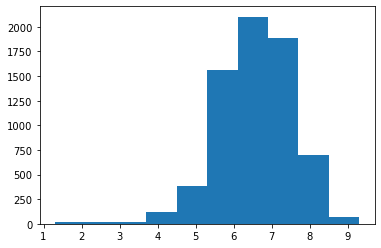

In [20]:
plt.hist(imdb.averagerating);

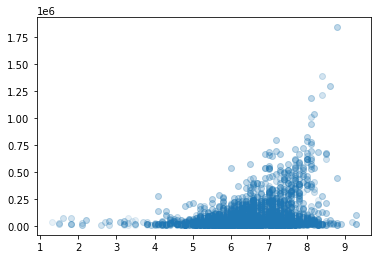

In [21]:
plt.scatter(imdb.averagerating,imdb.numvotes,alpha = 0.1);

Assessing bom_movies

In [22]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


1. foreign_gross dtype is object-change to int
2. assess null values per column:

In [23]:
bom_movies.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [27]:
bom_movies.foreign_gross = bom_movies.foreign_gross.map(lambda x:x.replace(",",""))

In [28]:
bom_movies.foreign_gross = bom_movies.foreign_gross.astype(float)

In [29]:
bom_movies.loc[bom_movies.studio == 'LGF'][:20]

,title,studio,domestic_gross,foreign_gross,year
26,The Expendables,LGF,103100000.0,171400000.0,2010
51,Saw 3D,LGF,45700000.0,90400000.0,2010
64,Killers,LGF,47100000.0,51100000.0,2010
65,Kick-Ass,LGF,48100000.0,48100000.0,2010
87,The Last Exorcism,LGF,41000000.0,26700000.0,2010
88,The Next Three Days,LGF,21100000.0,46300000.0,2010
94,Tyler Perry's Why Did I Get Married Too?,LGF,60100000.0,578000.0,2010
101,From Paris with Love,LGF,24100000.0,28700000.0,2010
102,Daybreakers,LGF,30100000.0,21300000.0,2010
103,Alpha and Omega,LGF,25100000.0,25400000.0,2010


<AxesSubplot:xlabel='studio'>

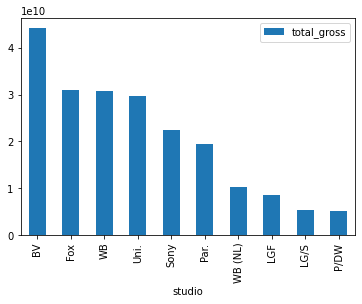

In [32]:
pd.DataFrame(bom_movies.groupby(['studio'])['total_gross'].sum().sort_values(ascending = False)[:10]).plot(kind='bar')

In [33]:
bom_movies['total_gross'] = bom_movies.domestic_gross + bom_movies.foreign_gross

In [34]:
bom_movies

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


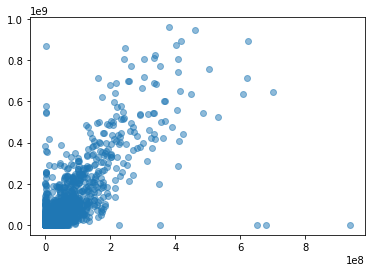

In [72]:
plt.scatter(bom_movies.domestic_gross,bom_movies.foreign_gross,alpha = 0.5);

In [36]:
np.corrcoef(bom_movies.domestic_gross,bom_movies.foreign_gross)

array([[1.        , 0.79234835],
       [0.79234835, 1.        ]])

In [37]:
#checking for duplicates
bom_movies.duplicated().sum()

0

Assessing rt_reviews

In [49]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [50]:
rt_reviews.fresh.value_counts()

fresh     20765
rotten    13223
Name: fresh, dtype: int64

The rating column is not consistent with the rating format, it can therefore be dropped. The fresh column can be used to 

In [52]:
#checking for duplicates
rt_reviews.duplicated().sum()

0

In [51]:
rt_reviews.drop('rating', inplace = True, axis = 1)

In [53]:
rt_merged = rt_reviews.merge(rt_movies, how = 'inner',on = 'id')

In [56]:
rt_genres.runtime = rt_genres.runtime.str.replace('minutes',"")

In [57]:
rt_genres.runtime = rt_genres.runtime.astype('int')

In [58]:
rt_genres = rt_merged.assign(genre=rt_merged.genre.str.split('|')).explode('genre')

<AxesSubplot:xlabel='rating'>

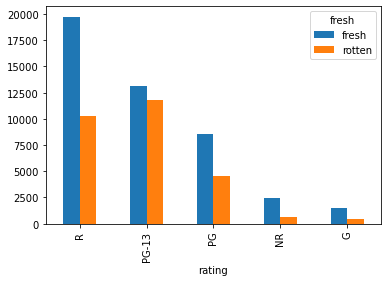

In [59]:
rt_genres.groupby(['rating','fresh']).count()['id'].unstack().sort_values(['fresh','rotten'],ascending=False).plot(kind='bar')

In [60]:
rt_genres

,id,review,fresh,critic,top_critic,publisher,date,rating,genre,runtime
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Drama,108 minutes
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Science Fiction and Fantasy,108 minutes
1,3,"Quickly grows repetitive and tiresome, meander...",rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",R,Drama,108 minutes
1,3,"Quickly grows repetitive and tiresome, meander...",rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",R,Science Fiction and Fantasy,108 minutes
2,3,Cronenberg is not a director to be daunted by ...,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",R,Drama,108 minutes
...,...,...,...,...,...,...,...,...,...,...
33407,2000,Dawdles and drags when it should pop; it doesn...,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",R,Action and Adventure,94 minutes
33407,2000,Dawdles and drags when it should pop; it doesn...,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",R,Art House and International,94 minutes
33407,2000,Dawdles and drags when it should pop; it doesn...,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",R,Comedy,94 minutes
33407,2000,Dawdles and drags when it should pop; it doesn...,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",R,Drama,94 minutes


<AxesSubplot:xlabel='genre'>

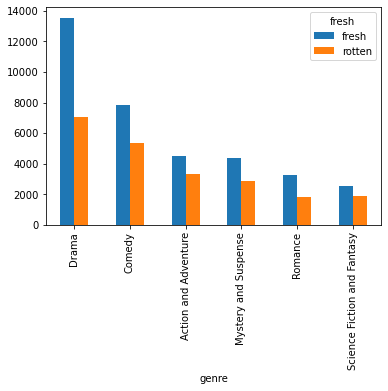

In [61]:
rt_genres.groupby(['genre','fresh']).count()['id'].unstack().sort_values(['fresh','rotten'],ascending=False)[:6].plot(kind='bar')

In [ ]:
conn.close()